In [97]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('./BreadBasket_DMS.csv')
df

,Date,Time,Transaction,Item
0,2016-10-30,9:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [4]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [6]:
df['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
The BART             1
Adjustment           1
Olum & polenta       1
Bacon                1
Name: Item, Length: 95, dtype: int64

In [7]:
df['Item'].value_counts().head(15)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64

<AxesSubplot:>

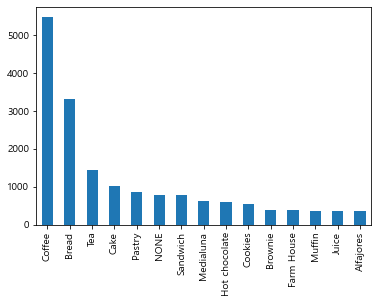

In [8]:
df['Item'].value_counts().head(15).plot(kind='bar')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [10]:
pd.to_datetime(df['Date'])

0       2016-10-30
1       2016-10-30
2       2016-10-30
3       2016-10-30
4       2016-10-30
           ...    
21288   2017-04-09
21289   2017-04-09
21290   2017-04-09
21291   2017-04-09
21292   2017-04-09
Name: Date, Length: 21293, dtype: datetime64[ns]

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 665.5+ KB


In [13]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,9:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [14]:
df['Date'].dt.year

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
21288    2017
21289    2017
21290    2017
21291    2017
21292    2017
Name: Date, Length: 21293, dtype: int64

In [15]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_name'] = df['Date'].dt.day_name()

In [16]:
df

,Date,Time,Transaction,Item,year,month,day_name
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday
...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,2017,4,Sunday
21289,2017-04-09,14:32:58,9682,Tea,2017,4,Sunday
21290,2017-04-09,14:57:06,9683,Coffee,2017,4,Sunday
21291,2017-04-09,14:57:06,9683,Pastry,2017,4,Sunday


In [17]:
df.sample(10)

,Date,Time,Transaction,Item,year,month,day_name
20487,2017-04-03,14:52:18,9320,Coffee,2017,4,Monday
18677,2017-03-21,12:42:28,8526,Mineral water,2017,3,Tuesday
13184,2017-02-08,9:42:40,6207,Pastry,2017,2,Wednesday
15880,2017-02-27,10:54:38,7286,Pastry,2017,2,Monday
20230,2017-04-01,13:33:58,9210,Coke,2017,4,Saturday
13605,2017-02-11,11:15:52,6382,Bread,2017,2,Saturday
8307,2016-12-29,14:43:45,3969,Coffee,2016,12,Thursday
8132,2016-12-28,12:26:20,3900,Coffee,2016,12,Wednesday
19487,2017-03-26,14:53:08,8878,Brownie,2017,3,Sunday
12505,2017-02-04,10:49:38,5914,Tea,2017,2,Saturday


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


In [21]:
df['Time'].str.split(':').str[0]

0         9
1        10
2        10
3        10
4        10
         ..
21288    14
21289    14
21290    14
21291    14
21292    15
Name: Time, Length: 21293, dtype: object

In [22]:
df['Time'].apply(lambda x: x.split(':')[0])

0         9
1        10
2        10
3        10
4        10
         ..
21288    14
21289    14
21290    14
21291    14
21292    15
Name: Time, Length: 21293, dtype: object

In [23]:
df['Time'].apply(lambda x: x.split(':')[0]).astype('int')

0         9
1        10
2        10
3        10
4        10
         ..
21288    14
21289    14
21290    14
21291    14
21292    15
Name: Time, Length: 21293, dtype: int32

In [24]:
df['hour'] = df['Time'].apply(lambda x: x.split(':')[0]).astype('int')

In [25]:
df

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10
...,...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,2017,4,Sunday,14
21289,2017-04-09,14:32:58,9682,Tea,2017,4,Sunday,14
21290,2017-04-09,14:57:06,9683,Coffee,2017,4,Sunday,14
21291,2017-04-09,14:57:06,9683,Pastry,2017,4,Sunday,14


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
 7   hour         21293 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 1.2+ MB


In [27]:
df['day_name'].value_counts()

Saturday     4803
Friday       3235
Sunday       3233
Thursday     2719
Tuesday      2480
Wednesday    2429
Monday       2394
Name: day_name, dtype: int64

<AxesSubplot:>

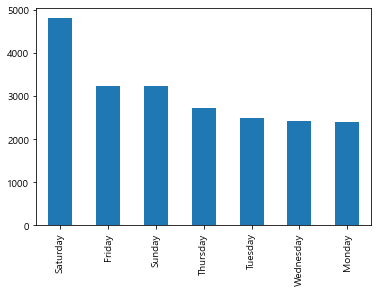

In [28]:
df['day_name'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='day_name', ylabel='count'>

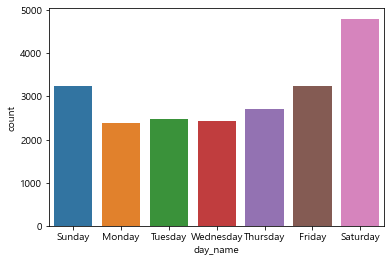

In [30]:
sns.countplot(x='day_name', data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

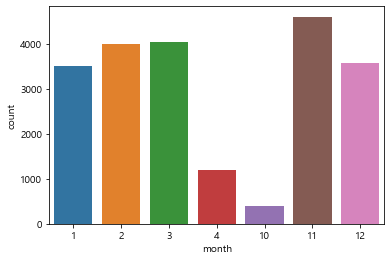

In [31]:
sns.countplot(x='month', data=df)

<AxesSubplot:xlabel='hour', ylabel='count'>

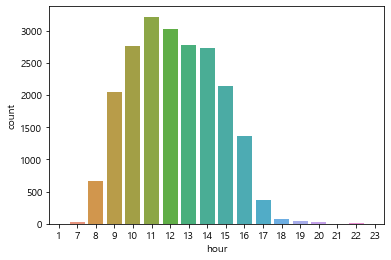

In [32]:
sns.countplot(x='hour', data=df)

In [34]:
tmp = [[]] * 3
tmp[0].append(3)
tmp

[[3], [3], [3]]

In [35]:
tmp = [[] for i in range(3)]
tmp[0].append(3)
tmp

[[3], [], []]

In [36]:
df.head(10)

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,9:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10
5,2016-10-30,10:07:57,3,Cookies,2016,10,Sunday,10
6,2016-10-30,10:08:41,4,Muffin,2016,10,Sunday,10
7,2016-10-30,10:13:03,5,Coffee,2016,10,Sunday,10
8,2016-10-30,10:13:03,5,Pastry,2016,10,Sunday,10
9,2016-10-30,10:13:03,5,Bread,2016,10,Sunday,10


In [38]:
df_tmp = df[['Transaction', 'Item']]
df_tmp

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


In [68]:
cnt = df_tmp.max()
cnt

Transaction                9684
Item           Victorian Sponge
dtype: object

In [71]:
cnt[0]

9684

In [53]:
df_tmp_arr = [[] for i in range(cnt[0]+1)]
df_tmp_arr

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [54]:
for idx,i in enumerate(df['Item']):
    df_tmp_arr[df['Transaction'][idx]].append(i)

In [55]:
df_tmp_arr

[[],
 ['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread', 'NONE'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['NONE', 'NONE', 'Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam', 'NONE'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread', 'NONE'],
 ['Bread', 'Tea

In [56]:
df_tmp_arr = df_tmp_arr[1:]
df_tmp_arr

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread', 'NONE'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['NONE', 'NONE', 'Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam', 'NONE'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread', 'NONE'],
 ['Bread', 'Tea'],
 

In [57]:
df_tmp_arr[3]

['Muffin']

In [59]:
df_tmp_arr[5]

['Medialuna', 'Pastry', 'Muffin']

In [60]:
df_tmp_arr[0]

['Bread']

In [65]:
df_tmp_arr = [list(set(i)) for i in df_tmp_arr]

In [66]:
df_tmp_arr

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Jam', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Pastry', 'Medialuna', 'Muffin'],
 ['Pastry', 'Coffee', 'Medialuna', 'Tea'],
 ['Pastry', 'Bread'],
 ['Muffin', 'Bread'],
 ['Scandinavian', 'Medialuna'],
 ['NONE', 'Medialuna', 'Bread'],
 ['Coffee', 'Jam', 'Pastry', 'Tea', 'Tartine'],
 ['Basket', 'Coffee', 'Bread'],
 ['Pastry', 'Medialuna', 'Bread'],
 ['NONE', 'Scandinavian', 'Mineral water'],
 ['Coffee', 'Medialuna', 'Bread'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Medialuna', 'Bread'],
 ['Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Muffin', 'Scandinavian'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Jam', 'NONE', 'Bread'],
 ['Bread'],
 ['Basket'],
 ['Muffin', 'Scandinavian'],
 ['Coffee'],
 ['Muffin', 'Coffee'],
 ['Muffin', 'Scandinavian'],
 ['Bread', 'Tea'],
 ['NONE', 'Coffee', 'Bread'],
 ['Tea', 'Bread'],
 ['Scandinavian'],
 ['Coffee', 'NONE', 'Muff

In [72]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [74]:
te = TransactionEncoder()
te_arry = te.fit(df_tmp_arr).transform(df_tmp_arr)

In [75]:
te_arry

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [76]:
te.columns_

['Adjustment',
 'Afternoon with the baker',
 'Alfajores',
 'Argentina Night',
 'Art Tray',
 'Bacon',
 'Baguette',
 'Bakewell',
 'Bare Popcorn',
 'Basket',
 'Bowl Nic Pitt',
 'Bread',
 'Bread Pudding',
 'Brioche and salami',
 'Brownie',
 'Cake',
 'Caramel bites',
 'Cherry me Dried fruit',
 'Chicken Stew',
 'Chicken sand',
 'Chimichurri Oil',
 'Chocolates',
 'Christmas common',
 'Coffee',
 'Coffee granules ',
 'Coke',
 'Cookies',
 'Crepes',
 'Crisps',
 'Drinking chocolate spoons ',
 'Duck egg',
 'Dulce de Leche',
 'Eggs',
 "Ella's Kitchen Pouches",
 'Empanadas',
 'Extra Salami or Feta',
 'Fairy Doors',
 'Farm House',
 'Focaccia',
 'Frittata',
 'Fudge',
 'Gift voucher',
 'Gingerbread syrup',
 'Granola',
 'Hack the stack',
 'Half slice Monster ',
 'Hearty & Seasonal',
 'Honey',
 'Hot chocolate',
 'Jam',
 'Jammie Dodgers',
 'Juice',
 'Keeping It Local',
 'Kids biscuit',
 'Lemon and coconut',
 'Medialuna',
 'Mighty Protein',
 'Mineral water',
 'Mortimer',
 'Muesli',
 'Muffin',
 'My-5 Fruit S

In [77]:
df = pd.DataFrame(te_arry, columns=te.columns_)
df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.035523,(Alfajores)
1,0.015696,(Baguette)
2,0.319806,(Bread)
3,0.039137,(Brownie)
4,0.101508,(Cake)
...,...,...
58,0.048740,"(Coffee, Tea)"
59,0.023131,"(Coffee, Toast)"
60,0.017968,"(NONE, Tea)"
61,0.014044,"(Sandwich, Tea)"


In [81]:
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.01)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.035523,0.319806,0.010120,0.284884,0.890802,-0.001241,0.951166
1,(Bread),(Alfajores),0.319806,0.035523,0.010120,0.031644,0.890802,-0.001241,0.995994
2,(Coffee),(Alfajores),0.467575,0.035523,0.019207,0.041078,1.156386,0.002597,1.005793
3,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
4,(Brownie),(Bread),0.039137,0.319806,0.010533,0.269129,0.841540,-0.001983,0.930663
...,...,...,...,...,...,...,...,...,...
63,"(Coffee, Bread)",(Pastry),0.087980,0.084159,0.010946,0.124413,1.478303,0.003542,1.045973
64,"(Pastry, Bread)",(Coffee),0.028501,0.467575,0.010946,0.384058,0.821382,-0.002380,0.864407
65,(Coffee),"(Pastry, Bread)",0.467575,0.028501,0.010946,0.023410,0.821382,-0.002380,0.994787
66,(Pastry),"(Coffee, Bread)",0.084159,0.087980,0.010946,0.130061,1.478303,0.003542,1.048373


In [82]:
association_rules(frequent_itemsets, metric='support', min_threshold=0.05)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.035523,0.319806,0.010120,0.284884,0.890802,-0.001241,0.951166
1,(Bread),(Alfajores),0.319806,0.035523,0.010120,0.031644,0.890802,-0.001241,0.995994
2,(Coffee),(Alfajores),0.467575,0.035523,0.019207,0.041078,1.156386,0.002597,1.005793
3,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
4,(Brownie),(Bread),0.039137,0.319806,0.010533,0.269129,0.841540,-0.001983,0.930663
...,...,...,...,...,...,...,...,...,...
63,"(Coffee, Bread)",(Pastry),0.087980,0.084159,0.010946,0.124413,1.478303,0.003542,1.045973
64,"(Pastry, Bread)",(Coffee),0.028501,0.467575,0.010946,0.384058,0.821382,-0.002380,0.864407
65,(Coffee),"(Pastry, Bread)",0.467575,0.028501,0.010946,0.023410,0.821382,-0.002380,0.994787
66,(Pastry),"(Coffee, Bread)",0.084159,0.087980,0.010946,0.130061,1.478303,0.003542,1.048373


In [84]:
support_list=[0.005, 0.01, 0.05, 0.1]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

total = []
for i in support_list:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    raw = []
    for j in con_list:
        tmp = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)
        raw.append(len(tmp))
    total.append(raw)
total

[[118, 61, 38, 28, 19, 4, 2, 1, 0],
 [42, 30, 18, 15, 12, 1, 1, 0, 0],
 [4, 2, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

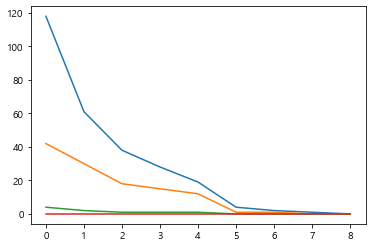

In [86]:
plt.plot(total[0])
plt.plot(total[1])
plt.plot(total[2])
plt.plot(total[3])

In [88]:
a = [1,2,3]
b = ['a','b','c']
list(zip(a,b))

for i,j in list(zip(a,b)):
    print(i, j)

1 a
2 b
3 c


In [89]:
a = [1,2,3]
b = [
    ['a1','a2','a3'],
    ['b1','b2','b3']
]
list(zip(a,b))

for i,j in list(zip(a,b)):
    print(i, j)

1 ['a1', 'a2', 'a3']
2 ['b1', 'b2', 'b3']


TypeError: plot got an unexpected keyword argument 'x'

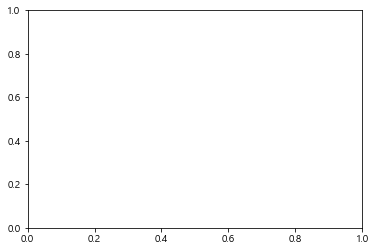

In [91]:
for i,j in zip(total, support_list):
    plt.plot(x=j)

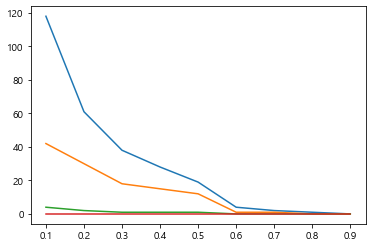

In [101]:
plt.plot(total[0])
plt.plot(total[1])
plt.plot(total[2])
plt.plot(total[3])
plt.xticks(np.arange(0, 9), labels=con_list)
plt.show()

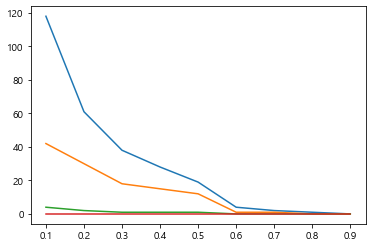

In [103]:
for i,j in zip(total, support_list):
    plt.plot(con_list, i)

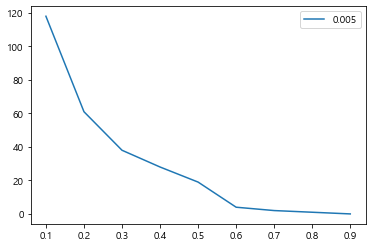

In [105]:
plt.plot(con_list, total[0], label='0.005')
plt.legend()

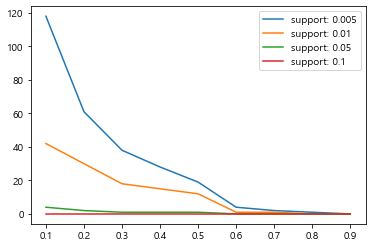

In [107]:
for i,j in zip(total,support_list):
    # print(i, j)
    plt.plot(con_list, i, label=f'support: {j}')
    plt.legend()

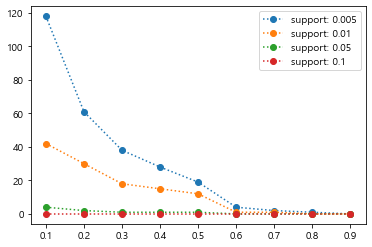

In [108]:
for i,j in zip(total,support_list):
    # print(i, j)
    plt.plot(con_list, i, 'o:', label=f'support: {j}')
    plt.legend()

In [ ]:
###################################################
## 지지도 10%, 5%의 경우 생성되는 규칙이 매우 적음 
##  지지도 0.5%의 경우 생성되는 규칙이 너무 많음
##  적정선인 지지도 1%를 선택하고자함.  
## 최소 50%의 신뢰도에서 15개 정도의 규칙이 생성되므로 
## 그 이상으로 신뢰도를 선택하고자함.
####################################################

In [ ]:
################################################################################
### 최소 지지도 1%(0.01), 최소 신뢰도 50%(0.05) 이상인 연관 규칙들을 생성
################################################################################

In [109]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.035523,(Alfajores)
1,0.015696,(Baguette)
2,0.319806,(Bread)
3,0.039137,(Brownie)
4,0.101508,(Cake)
...,...,...
58,0.048740,"(Coffee, Tea)"
59,0.023131,"(Coffee, Toast)"
60,0.017968,"(NONE, Tea)"
61,0.014044,"(Sandwich, Tea)"


In [110]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
1,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
2,(Cookies),(Coffee),0.053181,0.467575,0.027571,0.518447,1.108798,0.002705,1.105640
3,(Hot chocolate),(Coffee),0.057001,0.467575,0.028914,0.507246,1.084844,0.002261,1.080509
4,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
5,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
6,(NONE),(Coffee),0.077757,0.467575,0.041409,0.532537,1.138932,0.005051,1.138965
7,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839
8,(Sandwich),(Coffee),0.070219,0.467575,0.037381,0.532353,1.138539,0.004549,1.138518
9,(Scone),(Coffee),0.033767,0.467575,0.017658,0.522936,1.118399,0.001869,1.116044


In [111]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
10,(Spanish Brunch),(Coffee),0.017761,0.467575,0.010636,0.598837,1.280729,0.002331,1.327203
5,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
7,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839
0,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
4,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
6,(NONE),(Coffee),0.077757,0.467575,0.041409,0.532537,1.138932,0.005051,1.138965
8,(Sandwich),(Coffee),0.070219,0.467575,0.037381,0.532353,1.138539,0.004549,1.138518
1,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
9,(Scone),(Coffee),0.033767,0.467575,0.017658,0.522936,1.118399,0.001869,1.116044


In [113]:
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
10,(Spanish Brunch),(Coffee),0.017761,0.467575,0.010636,0.598837,1.280729,0.002331,1.327203
5,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
7,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839
0,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
4,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
6,(NONE),(Coffee),0.077757,0.467575,0.041409,0.532537,1.138932,0.005051,1.138965
8,(Sandwich),(Coffee),0.070219,0.467575,0.037381,0.532353,1.138539,0.004549,1.138518
1,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
9,(Scone),(Coffee),0.033767,0.467575,0.017658,0.522936,1.118399,0.001869,1.116044


In [114]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.01)

In [116]:
rules['length'] = rules['antecedents'].apply(lambda x: len(x))

In [119]:
rules = rules[rules['lift'] > 1]

In [120]:
rules[rules['length'] == 2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
63,"(Coffee, Bread)",(Pastry),0.08798,0.084159,0.010946,0.124413,1.478303,0.003542,1.045973,2


In [121]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [123]:
frequent_itemsets['length'] =  frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [127]:
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]

In [128]:
frequent_itemsets

,support,itemsets,length
31,0.010120,"(Alfajores, Bread)",2
32,0.019207,"(Coffee, Alfajores)",2
33,0.010533,"(Brownie, Bread)",2
34,0.022821,"(Cake, Bread)",2
35,0.087980,"(Coffee, Bread)",2
36,0.014147,"(Cookies, Bread)",2
37,0.013114,"(Hot chocolate, Bread)",2
38,0.016522,"(Medialuna, Bread)",2
39,0.020240,"(NONE, Bread)",2
40,0.028501,"(Pastry, Bread)",2


In [129]:
ar=frequent_itemsets['itemsets']

import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

C:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{'Alfajores': 0.03401795402080666,
 'Bread': 0.15867559974217835,
 'Coffee': 0.2684748359987527,
 'Brownie': 0.03401795402080666,
 'Cake': 0.05965950792278901,
 'Cookies': 0.03401795402080666,
 'Hot chocolate': 0.04669568599129706,
 'Medialuna': 0.03401795402080666,
 'NONE': 0.046428929913718595,
 'Pastry': 0.03401795402080666,
 'Sandwich': 0.046428929913718595,
 'Tea': 0.07300575165494495,
 'Juice': 0.02175683145976124,
 'Muffin': 0.02175683145976124,
 'Scone': 0.02175683145976124,
 'Soup': 0.02175683145976124,
 'Spanish Brunch': 0.02175683145976124,
 'Toast': 0.02175683145976124}

In [130]:
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
print(len(nsize))

18


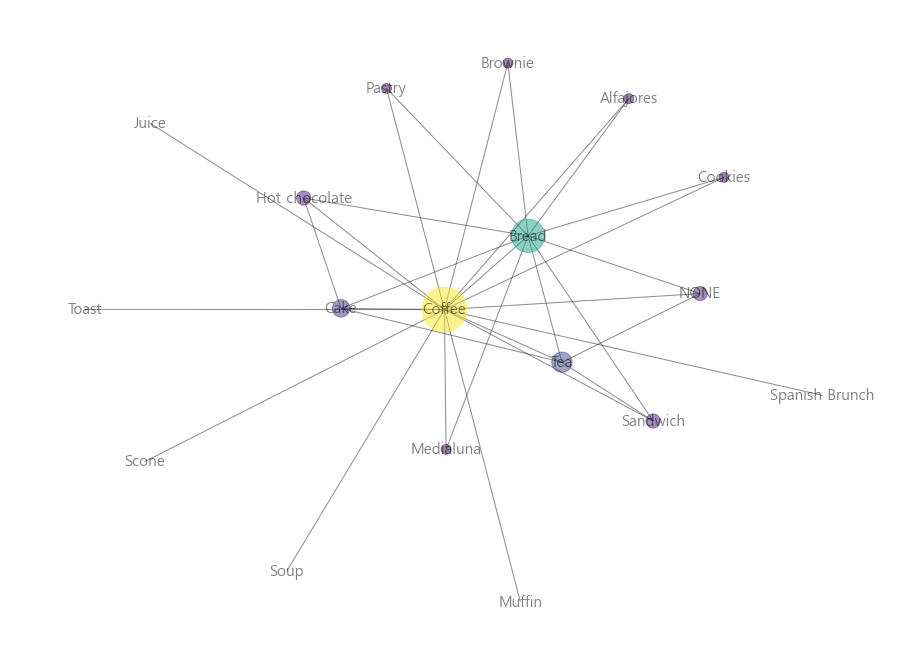

In [131]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)